
📂 Selected: C:/Users/srini/Downloads/golden retriver.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


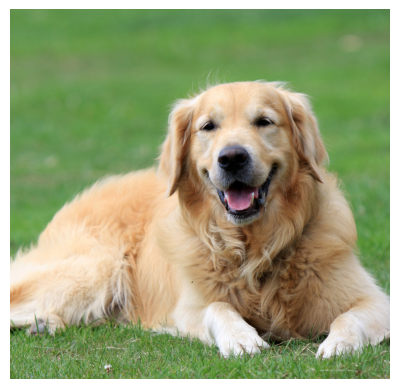

✅ Predictions:
golden_retriever: 0.95
Leonberg: 0.00
tennis_ball: 0.00


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights="imagenet")

def classify_image(img_path):
    """Load image, preprocess, classify and show predictions"""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predictions
    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=3)[0]

    # Show image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.show()

    # Print predictions
    print("✅ Predictions:")
    for (_, label, prob) in decoded:
        print(f"{label}: {prob:.2f}")

def pick_and_classify():
    """Opens a file picker dialog to choose an image and classify it"""
    Tk().withdraw()  # Prevents a blank Tk window from appearing
    filename = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.gif")]
    )
    
    if filename:
        print(f"\n📂 Selected: {filename}")
        classify_image(filename)
    else:
        print("❌ No file selected.")

# Run this to select an image and classify
pick_and_classify()
